In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [2]:
h = 0.1 # step size
N = 70000 # number of steps
T = np.arange(0, N*h, step=h) # for plotting, scaling the x-axis
lag = np.arange(0, 16, 1) # lag of autocorrelatin
Dr_1 = np.arange(0.1, 2.1, 0.1) 
Dr = 1/Dr_1

In [3]:
np.random.seed(7815)

z_mean = 0
z_sd = h ** 0.5

def zeta(n):
    return np.random.normal(z_mean, z_sd, (n,1))
    

def direction(N, dr):
    phi = np.zeros(N)
    rf = zeta(N)
    for i in range(1, N):
        phi[i] = phi[i-1] + np.sqrt(2*dr)*rf[i] 
    return phi


def get_acf(phi, lag):
    n = len(lag)
    acfs = np.zeros(n)
    for j in range(n):
        tmp = []
        start, end = int(lag[j]/h), len(phi)
        for i in range(start, end):
            tmp.append(np.cos(phi[i] - phi[i-start]))
        acfs[j] = np.mean(tmp)
    return acfs


def target_func(x, a):
    return np.exp(-x/a)


def get_MSD(v, tao):
    h, N = 0.1, 1000
    n = 1000 # amount of sample for calculating MSD
    x = np.zeros((n,N))
    y = np.zeros((n,N))
    MSD = np.zeros(N)
    for i in range(n):
        phi = direction(N, 1/tao)
        for j in range(1,N):
            x[i][j] = x[i][j-1] + h*v*np.cos(phi[j-1])
            y[i][j] = y[i][j-1] + h*v*np.sin(phi[j-1])
    for i in range(N):
        MSD[i] = np.mean([x[k][i]**2+y[k][i]**2 for k in range(n)])
    return MSD


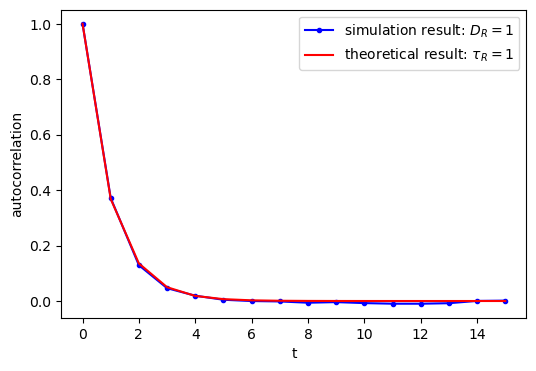

In [4]:
phi = direction(N, dr=1)
acf = get_acf(phi, lag)

plt.figure(figsize=(6,4))
plt.plot(lag, acf, marker='.', label='simulation result: $D_{R}=1$', c='blue')
plt.plot(lag, np.exp(-1*lag), label=r'theoretical result: $\tau_{R}=1$', c='red')
plt.xlabel('t')
plt.ylabel('autocorrelation')
plt.legend()
plt.show()

In [5]:
numerical_tao = []
for dr in Dr:
    phi = direction(N, dr)
    acfs = get_acf(phi, lag)
    para, cov = curve_fit(target_func, lag, acfs)
    numerical_tao.append(para[0])

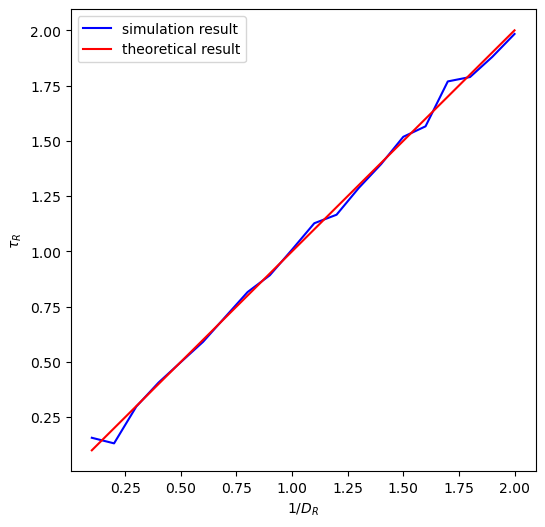

In [6]:
plt.figure(figsize=(6,6))
plt.plot(Dr_1, numerical_tao, label='simulation result', c='blue')
plt.plot(Dr_1, Dr_1, label='theoretical result', c='red')
plt.xlabel('$1/D_{R}$')
plt.ylabel(r'$\tau_{R}$')
plt.legend()
plt.show()   

In [7]:
msd_1 = get_MSD(v=0.5, tao=0.5)
msd_2 = get_MSD(v=1, tao=1)
msd_3 = get_MSD(v=1.5, tao=1.5)
msd_4 = get_MSD(v=2, tao=2)

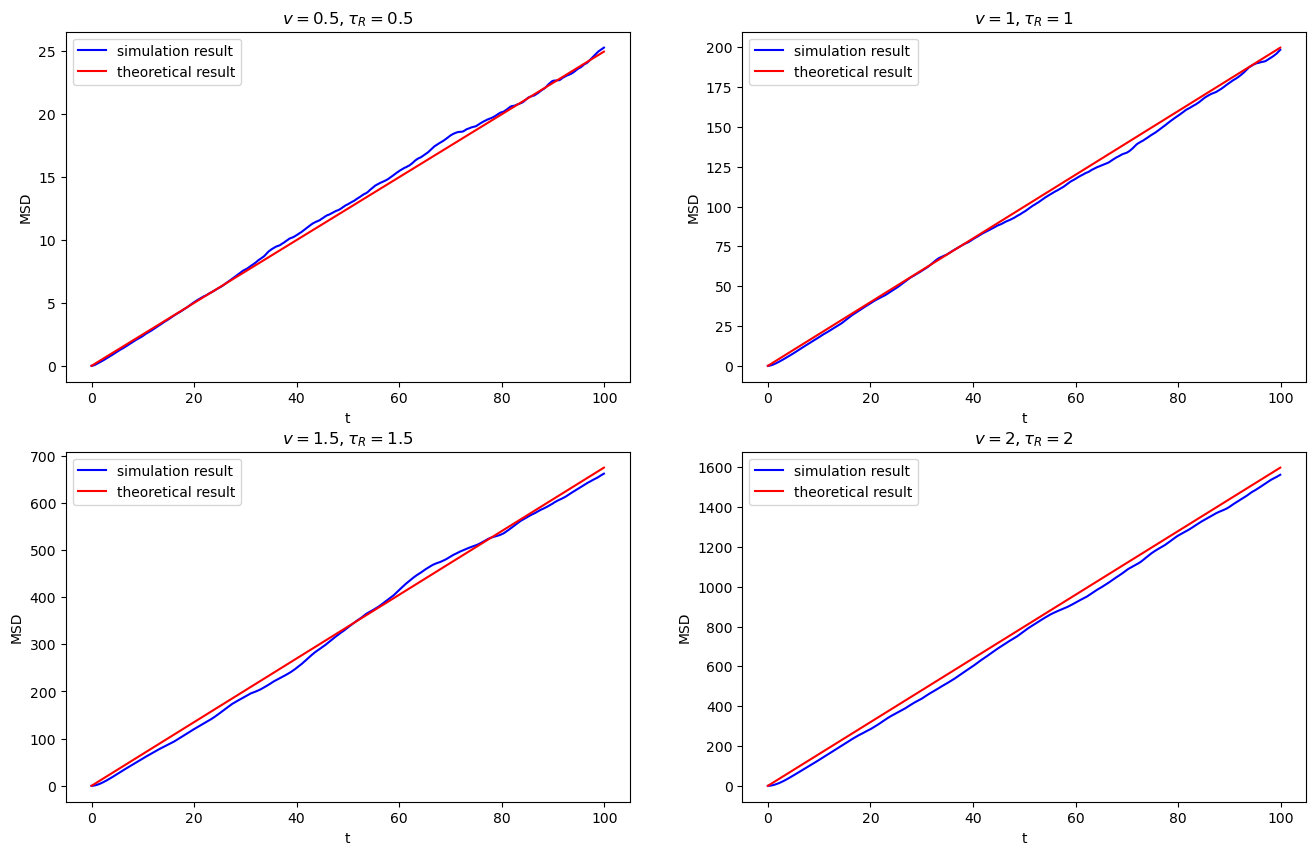

In [8]:
T = np.arange(0, 1000*0.1, step=0.1)
plt.figure(figsize = (16,10))

plt.subplot(2, 2, 1)
plt.plot(T, msd_1, label='simulation result', c='blue')
plt.plot(T, 0.25*T, label='theoretical result', c='red')
plt.xlabel('t')
plt.ylabel('MSD')
plt.title(r'$v=0.5, \tau_{R}=0.5$')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(T, msd_2, label='simulation result', c='blue')
plt.plot(T, 2*T, label='theoretical result', c='red')
plt.xlabel('t')
plt.ylabel('MSD')
plt.title(r'$v=1, \tau_{R}=1$')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(T, msd_3, label='simulation result', c='blue')
plt.plot(T, 6.75*T, label='theoretical result', c='red')
plt.xlabel('t')
plt.ylabel('MSD')
plt.title(r'$v=1.5, \tau_{R}=1.5$')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(T, msd_4, label='simulation result', c='blue')
plt.plot(T, 16*T, label='theoretical result', c='red')
plt.xlabel('t')
plt.ylabel('MSD')
plt.title(r'$v=2, \tau_{R}=2$')
plt.legend()

plt.show()   

In [9]:
T = np.arange(0, 1000*0.1, step=0.1) 
lis = np.arange(0.1, 2.1, 0.1)
res = []
for item in lis:
    msd = get_MSD(v=item, tao=item)
    result = linregress(T, msd)
    res.append(result.slope)

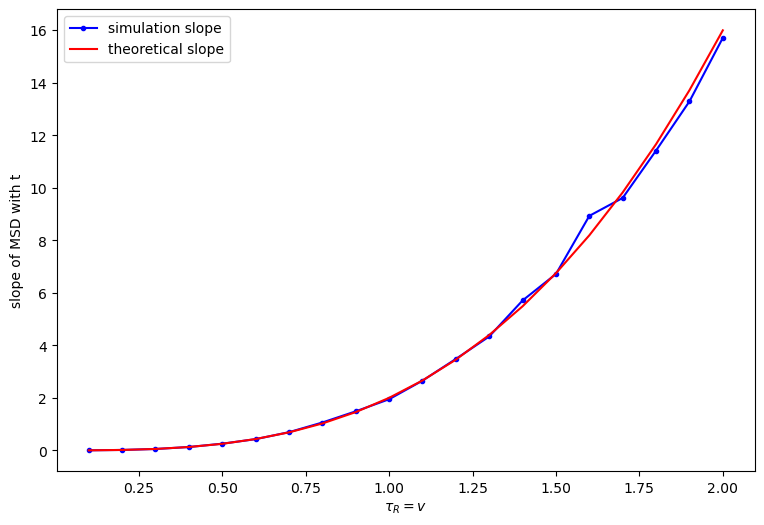

In [10]:
theo = 2 * lis**3
plt.figure(figsize = (9,6))
plt.plot(lis, res, label='simulation slope', c='blue', marker='.')
plt.plot(lis, theo, label='theoretical slope', c='red')
plt.xlabel(r'$\tau_{R}=v$')
plt.ylabel('slope of MSD with t')
plt.legend()
plt.show()